# Logistic regression

## Code

### 1. Chuẩn bị dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/bank_marketing.csv')
term_deposits = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### 2. Chuẩn bị thư viện

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

###  Attributes Description:
Input variables:

#### 1. bank client data:
1. - age: (numeric)
2. - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education: (categorical: primary, secondary, tertiary and unknown)
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
8. - balance: Balance of the individual.

#### 2. Related with the last contact of the current campaign:
8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### 3. other attributes:
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21. - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
df = df.drop(['duration'], axis=1)

In [7]:
print('Dữ liệu còn thiếu:', np.sum(df.isna().sum()))

Dữ liệu còn thiếu: 0


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
LE = LabelEncoder()
LE.fit(df['deposit'])
df['deposit'] = LE.transform(df['deposit'])

In [11]:
df['deposit'].unique()

array([1, 0])

In [12]:
df_1hot = pd.get_dummies(df, drop_first=True)
df_1hot.shape

(11162, 42)

In [13]:
df.shape

(11162, 16)

In [14]:
df_1hot.head()

,age,balance,day,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y = df_1hot['deposit']
X = df_1hot.drop(['deposit'],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=99, stratify=y)

In [18]:
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [19]:
y = y.to_numpy()
X = X.to_numpy()

### 1. Model 1: Logistic regression 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LogR = LogisticRegression(max_iter=10000)
LogR.fit(X_train, y_train)
LogR.score(X_train, y_train)

0.7071340575652368

In [22]:
LogR.score(X_test, y_test)

0.6914464845499328

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
LogR_scale = LogisticRegression()
LogR_scale.fit(X_train_scale, y_train)
LogR_scale.score(X_train_scale, y_train)

0.7102699070444619

In [25]:
LogR_scale.score(X_test_scale, y_test)

0.6914464845499328

In [26]:
y_pred_logR = LogR.predict(X_test)
y_pred_logRS = LogR_scale.predict(X_test_scale)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [28]:
print('Logistic regression with max_iter=10000')
print(classification_report(y_test, y_pred_logR))

Logistic regression with max_iter=10000
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1152
           1       0.71      0.61      0.66      1081

    accuracy                           0.69      2233
   macro avg       0.69      0.69      0.69      2233
weighted avg       0.69      0.69      0.69      2233



In [29]:
print('Logistic regression with scaler')
print(classification_report(y_test, y_pred_logRS))

Logistic regression with scaler
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1152
           1       0.73      0.57      0.64      1081

    accuracy                           0.69      2233
   macro avg       0.70      0.69      0.69      2233
weighted avg       0.70      0.69      0.69      2233



Confusion matrix of Logistic Regression with max_iter=10000


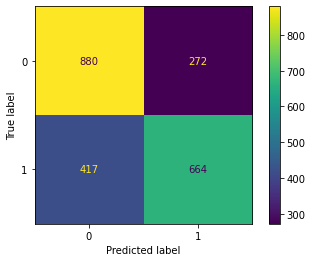

In [30]:
cm_logR = confusion_matrix(y_test, y_pred_logR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logR)
print('Confusion matrix of Logistic Regression with max_iter=10000')
disp.plot();

Confusion matrix of Logistic regression with scaler


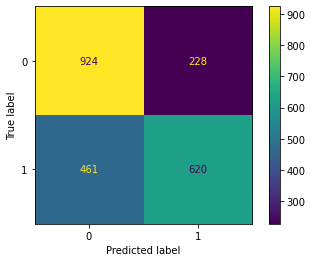

In [31]:
cm_logRS = confusion_matrix(y_test, y_pred_logRS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logRS)
print('Confusion matrix of Logistic regression with scaler')
disp.plot();

In [32]:
y_prob = LogR.predict_proba(X_test)
y_probS = LogR_scale.predict_proba(X_test_scale)

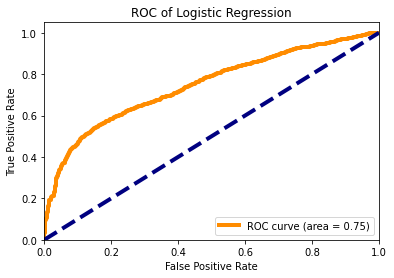

In [33]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 4
plt.plot(
    fpr,
    tpr,
    lw=lw,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")
plt.show()

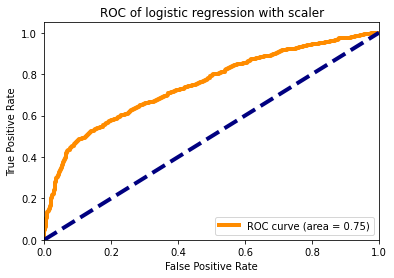

In [178]:
fpr, tpr, thresholds = roc_curve(y_test, y_probS[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 4
plt.plot(
    fpr,
    tpr,
    lw=lw,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of logistic regression with scaler")
plt.legend(loc="lower right")
plt.show()

=> Mặc dù accuracy hơi khác nhau, đồng thời true positive và true negative cũng hơi khác nhau nhưng tổng thể hai mô hình này hiệu suất tương đương nhau

## 2. Mô hình kNN 

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.7034382349647217

In [181]:
knn.score(X_test, y_test)

0.5911330049261084

In [183]:
y_predict_knn = knn.predict(X_test)
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      1152
           1       0.59      0.51      0.55      1081

    accuracy                           0.59      2233
   macro avg       0.59      0.59      0.59      2233
weighted avg       0.59      0.59      0.59      2233



Confusion matrix of kNN model


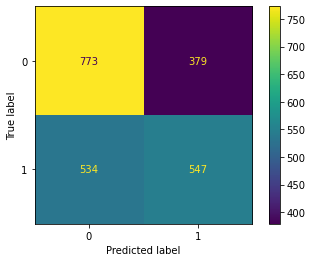

In [184]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
print('Confusion matrix of kNN model')
disp.plot();

=> Mô hình nhận diện nhãn 1 không hiệu quả

In [185]:
y_prob_knn = knn.predict_proba(X_test)

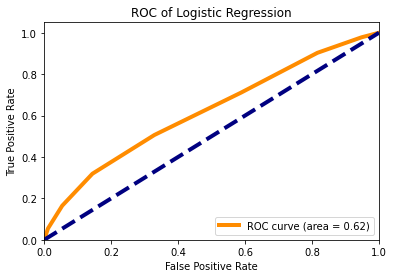

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 4
plt.plot(
    fpr,
    tpr,
    lw=lw,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")
plt.show()

## Thử cải thiện mô hình kNN 

In [210]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [217]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))
# pipe = make_pipeline( MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))
# pipe = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors=7))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [218]:
pipe.score(X_test, y_test)

0.690103000447828

In [213]:
y_predict_pipe = pipe.predict(X_test)
print(classification_report(y_test, y_predict_pipe))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1152
           1       0.70      0.62      0.66      1081

    accuracy                           0.69      2233
   macro avg       0.69      0.69      0.69      2233
weighted avg       0.69      0.69      0.69      2233



Confusion matrix of kNN model_Scaler


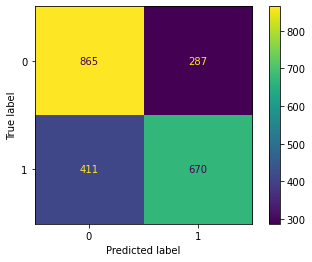

In [214]:
cm_pipe = confusion_matrix(y_test, y_predict_pipe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pipe)
print('Confusion matrix of kNN model_Scaler')
disp.plot();

=> TP và TN có cải thiện

In [215]:
y_prob_pipe = pipe.predict_proba(X_test)

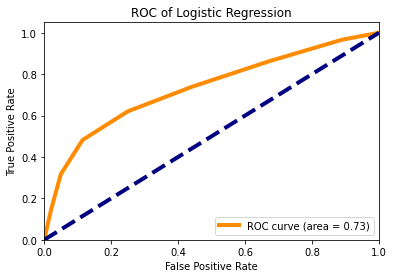

In [216]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pipe[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 4
plt.plot(
    fpr,
    tpr,
    lw=lw,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")
plt.show()

=> Hiệu suất mô hình tăng 10%